# EDA for Marks engineering employees project

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [3]:
base_df = pd.read_excel("../data/raw_data.xlsx", sheet_name="БАза")

/home/frznfrg/mambaforge/envs/marks/lib/python3.10/site-packages/openpyxl/worksheet/_read_only.py:85: UserWarning: Conditional Formatting extension is not supported and will be removed
  for idx, row in parser.parse():


In [4]:
base_df.head()

,Номер,Стаж,Возраст,Остатки отпусков по основному месту работы / внешний совместитель (осн. Место не в группе компаний),Дата увольнения,Примечание,2024-01-01 00:00:00,2024-02-01 00:00:00,2024-03-01 00:00:00,2024-04-01 00:00:00,2024-05-01 00:00:00,2024-06-01 00:00:00,2024-07-01 00:00:00,2024-08-01 00:00:00,2024-09-01 00:00:00,Количество изменений,Факт повышения,% повышения,Оценка 360 градусов,Оценка 360 градусов (интерпритация данных),NPS,Критичные,Потенциал,"Востребованность \n1 - высокая, 0 - низкая",Высокая корп. интеграция\n1 - да,Обучение анг.яз,BIM лидер,Рекомендательный рекрутинг 1,Рекомендательный рекрутинг 2,Рекомендательный рекрутинг 3,HH,HH коммент,"ФАКТ переведенный на 8 часов, май","Выход в выходной, май","ФАКТ, май","К-т переработки, май",000000085,000000363,БП-БП-377,000000105,000000378,000000359,000000369,000000312,000000009,000000203,БП-БП-572,000000372,000000298,000000151,000000373,000000371,000000370,БП-БП-402,000000211,000000026,000000297,БП-БП-399,000000025,000000383,БП-БП-407,000000329,000000328,000000323,БП-БП-405,БП-БП-323,000000391,БП-БП-328,000000331,000000334,000000392,БП-БП-541,БП-БП-532,000000106,000000394,БП-БП-542,000000361,000000396,БП-БП-331,000000395,000000343,БП-БП-330,000000354,БП-БП-329,000000197,000000355,000000005,000000358,000000353,БП-БП-394,БП-БП-361,000000238,БП-БП-341,БП-БП-339,000000176,000000064,БП-БП-396,БП-БП-388,БП-БП-403,БП-БП-401,000000071,БП-БП-383,000000113,БП-БП-469,БП-БП-470,000000059,БП-БП-539,000000038,000000098,NaN,000000159,000000002,000000232,000000295,000000308,000000321,000000322,000000341,000000357,000000366,000000375,000000387,000000388,000000393,БП-БП-362,БП-БП-365,БП-БП-368,БП-БП-387,БП-БП-392,БП-БП-391,БП-БП-395,БП-БП-398,БП-БП-381,000000052,000000168,000000227,000000330,000000380,000000379,000000152,000000145,000000142,000000245,000000216,000000338,000000090,000000374,000000129,БП-БП-360,000000045,БП-БП-369,БП-БП-370,БП-БП-371,БП-БП-375,БП-БП-374,000000068,000000243,000000013,БП-БП-417,БП-БП-373,000000253,000000349,Внепроектное совещание,БП-БП-372,БП-БП-416,БП-БП-393,БП-БП-414,БП-БП-412,БП-БП-389,000000356,БП-БП-415,000000350,БП-БП-357,БП-БП-411,000000225,000000365,БП-БП-386,БП-БП-380,БП-БП-326,БП-БП-385,Образовательная деятельность,ПЕРСПЕКТИВНЫЕ ПРОЕКТЫ,Поручение непосредственного руководителя,000000313,ПРОЕКТНАЯ ДЕЯТЕЛЬНОСТЬ,000000207,РАБОТЫ БЕЗ ДОГОВОРА,000000039,БП-БП-342,000000215,БП-БП-363,000000030,БП-БП-366,БП-БП-467,БП-БП-410,БП-БП-322,Количество проектов май,"ФАКТ переведенный на 8 часов, июнь","Выход в выходной, июнь","ФАКТ, июнь","К-т переработки, июнь",000000085.1,000000363.1,БП-БП-377.1,000000105.1,000000378.1,000000359.1,000000369.1,000000312.1,000000009.1,000000203.1,БП-БП-572.1,000000372.1,000000298.1,000000151.1,000000373.1,000000371.1,000000370.1,БП-БП-402.1,000000211.1,000000026.1,000000297.1,БП-БП-399.1,000000025.1,000000383.1,БП-БП-407.1,000000329.1,000000323.1,БП-БП-405.1,000000391.1,БП-БП-328.1,000000331.1,000000334.1,000000392.1,БП-БП-541.1,БП-БП-532.1,000000106.1,000000394.1,nan.1,nan.2,nan.3,000000361.1,nan.4,000000396.1,БП-БП-331.1,000000395.1,000000343.1,БП-БП-330.1,nan.5,000000354.1,БП-БП-329.1,000000197.1,000000355.1,000000005.1,000000353.1,БП-БП-394.1,БП-БП-361.1,000000238.1,БП-БП-341.1,БП-БП-339.1,000000176.1,000000064.1,nan.6,БП-БП-396.1,БП-БП-388.1,БП-БП-403.1,БП-БП-401.1,nan.7,БП-БП-383.1,000000113.1,БП-БП-469.1,БП-БП-470.1,nan.8,nan.9,000000059.1,БП-БП-539.1,nan.10,nan.11,000000038.1,000000098.1,000000002.1,000000295.1,000000308.1,000000321.1,000000322.1,000000341.1,000000357.1,000000366.1,000000375.1,000000388.1,000000393.1,БП-БП-362.1,БП-БП-365.1,БП-БП-368.1,БП-БП-387.1,БП-БП-392.1,БП-БП-391.1,БП-БП-395.1,БП-БП-398.1,БП-БП-381.1,000000052.1,nan.12,000000227.1,000000330.1,000000380.1,000000379.1,000000152.1,000000145.1,000000142.1,nan.13,nan.14,000000216.1,000000090.1,БП-БП-360.1,000000045.1,БП-БП-370.1,БП-БП-375.1,БП-БП-374.1,БП-БП-373.1,000000253.1,000000349.1,Внепроектное совещание.1,БП-БП-372.1,БП-БП-416.1,БП-БП-393.1,Б

In [5]:
# removing irrelevant service columns
base_df = base_df.loc[:, ~base_df.columns.str.startswith("0").fillna(False)]
base_df = base_df.loc[:, ~base_df.columns.str.startswith("БП").fillna(False)]
base_df = base_df.loc[:, ~base_df.columns.str.startswith("nan").fillna(False)]
base_df = base_df[base_df.columns.dropna()]

In [6]:
base_df.rename(
    columns={
        "Остатки отпусков по основному месту работы / внешний совместитель (осн. Место не в группе компаний)": "Остатки отпусков",
        "Востребованность \n1 - высокая, 0 - низкая": "Востребован",
        "Высокая корп. интеграция\n1 - да": "Интегрирован",
        "Дата увольнения": "Уволен",
        "Примечание": "Работа приостановлена",
    },
    inplace=True,
)

In [7]:
base_df.to_csv("../data/base.csv")

In [8]:
base_df.head()

,Номер,Стаж,Возраст,Остатки отпусков,Уволен,Работа приостановлена,2024-01-01 00:00:00,2024-02-01 00:00:00,2024-03-01 00:00:00,2024-04-01 00:00:00,2024-05-01 00:00:00,2024-06-01 00:00:00,2024-07-01 00:00:00,2024-08-01 00:00:00,2024-09-01 00:00:00,Количество изменений,Факт повышения,% повышения,Оценка 360 градусов,Оценка 360 градусов (интерпритация данных),NPS,Критичные,Потенциал,Востребован,Интегрирован,Обучение анг.яз,BIM лидер,Рекомендательный рекрутинг 1,Рекомендательный рекрутинг 2,Рекомендательный рекрутинг 3,HH,HH коммент,"ФАКТ переведенный на 8 часов, май","Выход в выходной, май","ФАКТ, май","К-т переработки, май",Внепроектное совещание,Образовательная деятельность,ПЕРСПЕКТИВНЫЕ ПРОЕКТЫ,Поручение непосредственного руководителя,ПРОЕКТНАЯ ДЕЯТЕЛЬНОСТЬ,РАБОТЫ БЕЗ ДОГОВОРА,Количество проектов май,"ФАКТ переведенный на 8 часов, июнь","Выход в выходной, июнь","ФАКТ, июнь","К-т переработки, июнь",Внепроектное совещание.1,Образовательная деятельность.1,ПЕРСПЕКТИВНЫЕ ПРОЕКТЫ.1,Поручение непосредственного руководителя.1,ПРОЕКТНАЯ ДЕЯТЕЛЬНОСТЬ.1,РАБОТЫ БЕЗ ДОГОВОРА.1,Количество проектов июнь,"ФАКТ переведенный на 8 часов, июль","Выход в выходной, июль","ФАКТ, июль","К-т переработки, июль",Внепроектное совещание.2,Образовательная деятельность.2,ПЕРСПЕКТИВНЫЕ ПРОЕКТЫ.2,Поручение непосредственного руководителя.2,ПРОЕКТНАЯ ДЕЯТЕЛЬНОСТЬ.2,РАБОТЫ БЕЗ ДОГОВОРА.2,Количество проектов июль,"ФАКТ переведенный на 8 часов, август","Выход в выходной, август","ФАКТ, август","К-т переработки, август",ПЕРСПЕКТИВНЫЕ ПРОЕКТЫ.3,ПРОЕКТНАЯ ДЕЯТЕЛЬНОСТЬ.3,ТЕНДЕРНАЯ РАБОТА,Количество проектов август,"ФАКТ переведенный на 8 часов, сентябрь","Выход в выходной, сентябрь","ФАКТ, сентябрь","К-т переработки, сентябрь",ПЕРСПЕКТИВНЫЕ ПРОЕКТЫ.4,Количество проектов сентябрь
0,ID00000051,16.727778,39.219444,121.00,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.000000,3.788,высокие,0.575,0,1.0,1.0,1.0,NaT,NaN,NaN,NaN,NaN,0.0,0,159.0,0.0,159.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,166.2,0.0,166.2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,202.4,0.0,202.4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,99.2,0.0,99.2,1.0,0.0,0.0,0.0,0.0,188.8,0.0,188.8,1.0,0.0,0.0
1,ID00001319,2.002778,56.813889,0.00,2024-09-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.000000,0.000,NaN,0.000,0,0.0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,0.0,0,159.0,0.0,159.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,151.0,0.0,151.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,184.0,0.0,184.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,176.0,0.0,176.0,1.0,0.0,0.0,0.0,0.0,8.0,0.0,8.0,1.0,0.0,0.0
2,ID00000054,10.858333,39.688889,174.31,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.000000,3.887,высокие,0.605,0,0.0,NaN,1.0,NaT,NaN,NaN,NaN,NaN,0.0,0,208.0,0.0,208.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,196.6,0.0,196.6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,239.2,0.0,239.2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,387.2,0.0,387.2,1.0,0.0,0.0,0.0,0.0,281.6,0.0,281.6,1.0,0.0,0.0
3,ID00000049,6.427778,40.797222,7.33,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,+,0.0,0.0,0.315789,2.706,средние,-0.349,да,0.0,1.0,1.0,NaT,NaN,NaN,NaN,NaN,0.0,0,159.0,0.0,159.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,151.0,0.0,151.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,184.0,0.0,184.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,132.0,0.0,132.0,1.0,0.0,0.0,0.0,0.0,144.0,0.0,144.0,1.0,0.0,0.0
4,ID00000055,11.491667,33.972222,5.33,NaT,NaN,NaN,NaN,NaN,+,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.184211,3.409,средние,0.282,0,1.0,1.0,1.0,NaT,NaN,NaN,NaN,NaN,0.0,0,159.0,0.0,159.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,151.0,0.0,151.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,184.0,0.0,184.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,152.0,0.0,152.0,1.0,0.0,0.0,0.0,0.0,168.0,0.0,168.0,1.0,0.0,0.0


In [9]:
base_df.shape

(1263, 79)

In [10]:
base_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1263 entries, 0 to 1262
Data columns (total 79 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   Номер                                       1262 non-null   object        
 1   Стаж                                        1257 non-null   float64       
 2   Возраст                                     1262 non-null   float64       
 3   Остатки отпусков                            1262 non-null   float64       
 4   Уволен                                      68 non-null     datetime64[ns]
 5   Работа приостановлена                       28 non-null     object        
 6   2024-01-01 00:00:00                         90 non-null     object        
 7   2024-02-01 00:00:00                         91 non-null     object        
 8   2024-03-01 00:00:00                         97 non-null     object        
 9   2024-04-

In [11]:
base_df.nunique()

Номер                                         1262
Стаж                                           634
Возраст                                       1193
Остатки отпусков                               185
Уволен                                          49
Работа приостановлена                            2
2024-01-01 00:00:00                              1
2024-02-01 00:00:00                              1
2024-03-01 00:00:00                              1
2024-04-01 00:00:00                              1
2024-05-01 00:00:00                              1
2024-06-01 00:00:00                              1
2024-07-01 00:00:00                              1
2024-08-01 00:00:00                              1
2024-09-01 00:00:00                              1
Количество изменений                             5
Факт повышения                                   2
% повышения                                    124
Оценка 360 градусов                            445
Оценка 360 градусов (интерприта

In [12]:
# replacing all "promotion date" columns with the "time since last promotion" column

CURRENT_DATE = pd.Timestamp.now()  # replace with another sample date if needed

date_columns = base_df.columns[pd.to_datetime(base_df.columns, errors="coerce").notna()]


def months_since_last_promotion(row):
    """Calculates number of months without promotion for each employee."""
    promotion_dates = row[date_columns][row[date_columns] == "+"].index
    if promotion_dates.empty:
        return row["Стаж"] * 12
    last_promotion = max(promotion_dates)
    if pd.notna(row["Уволен"]):  # If employee has quit, use quit date
        return (row["Уволен"].year - last_promotion.year) * 12 + (
            row["Уволен"].month - last_promotion.month
        )

    # otherwise use current date
    return (CURRENT_DATE.year - last_promotion.year) * 12 + (
        CURRENT_DATE.month - last_promotion.month
    )


base_df["Месяцев без повышения"] = base_df.apply(months_since_last_promotion, axis=1)

/tmp/ipykernel_28341/4131789431.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  date_columns = base_df.columns[pd.to_datetime(base_df.columns, errors="coerce").notna()]


In [13]:
# calculating total number of recomendation recruitingss
recomend_cols = [
    "Рекомендательный рекрутинг 1",
    "Рекомендательный рекрутинг 2",
    "Рекомендательный рекрутинг 3",
]
base_df["Рекомендации"] = base_df[recomend_cols].apply(
    lambda x: sum(x.notnull()), axis=1
)

In [14]:
# removing redundant cols
on_remove = [
    "Оценка 360 градусов (интерпритация данных)",
    "HH коммент",
    "Факт повышения",
    "Рекомендательный рекрутинг 1",
    "Рекомендательный рекрутинг 2",
    "Рекомендательный рекрутинг 3",
]
base_df.drop(columns=on_remove, inplace=True)

# ...including ones with the promotioin date
base_df.drop(
    columns=base_df.columns[pd.to_datetime(base_df.columns, errors="coerce").notna()],
    inplace=True,
)
print(len(base_df.columns))

66


/tmp/ipykernel_28341/3853892915.py:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  columns=base_df.columns[pd.to_datetime(base_df.columns, errors="coerce").notna()],


In [15]:
bool_cols = [
    "Уволен",
    "Работа приостановлена",
    "Обучение анг.яз",
    "Критичные",
    "Потенциал",
    "Востребован",
    "Интегрирован",
    "Обучение анг.яз",
    "BIM лидер",
    "HH",
]

base_df[bool_cols] = (
    base_df[bool_cols].map(lambda x: False if pd.isna(x) or x == 0 else True).values
)

In [16]:
base_df["% повышения"] = base_df["% повышения"] * 100

In [17]:
base_df.isnull().sum()

Номер                                         1
Стаж                                          6
Возраст                                       1
Остатки отпусков                              1
Уволен                                        0
Работа приостановлена                         0
Количество изменений                          1
% повышения                                   1
Оценка 360 градусов                           1
NPS                                           1
Критичные                                     0
Потенциал                                     0
Востребован                                   0
Интегрирован                                  0
Обучение анг.яз                               0
BIM лидер                                     0
HH                                            0
ФАКТ переведенный на 8 часов, май             1
Выход в выходной, май                         1
ФАКТ, май                                     1
К-т переработки, май                    

In [18]:
base_df.head(10)

,Номер,Стаж,Возраст,Остатки отпусков,Уволен,Работа приостановлена,Количество изменений,% повышения,Оценка 360 градусов,NPS,Критичные,Потенциал,Востребован,Интегрирован,Обучение анг.яз,BIM лидер,HH,"ФАКТ переведенный на 8 часов, май","Выход в выходной, май","ФАКТ, май","К-т переработки, май",Внепроектное совещание,Образовательная деятельность,ПЕРСПЕКТИВНЫЕ ПРОЕКТЫ,Поручение непосредственного руководителя,ПРОЕКТНАЯ ДЕЯТЕЛЬНОСТЬ,РАБОТЫ БЕЗ ДОГОВОРА,Количество проектов май,"ФАКТ переведенный на 8 часов, июнь","Выход в выходной, июнь","ФАКТ, июнь","К-т переработки, июнь",Внепроектное совещание.1,Образовательная деятельность.1,ПЕРСПЕКТИВНЫЕ ПРОЕКТЫ.1,Поручение непосредственного руководителя.1,ПРОЕКТНАЯ ДЕЯТЕЛЬНОСТЬ.1,РАБОТЫ БЕЗ ДОГОВОРА.1,Количество проектов июнь,"ФАКТ переведенный на 8 часов, июль","Выход в выходной, июль","ФАКТ, июль","К-т переработки, июль",Внепроектное совещание.2,Образовательная деятельность.2,ПЕРСПЕКТИВНЫЕ ПРОЕКТЫ.2,Поручение непосредственного руководителя.2,ПРОЕКТНАЯ ДЕЯТЕЛЬНОСТЬ.2,РАБОТЫ БЕЗ ДОГОВОРА.2,Количество проектов июль,"ФАКТ переведенный на 8 часов, август","Выход в выходной, август","ФАКТ, август","К-т переработки, август",ПЕРСПЕКТИВНЫЕ ПРОЕКТЫ.3,ПРОЕКТНАЯ ДЕЯТЕЛЬНОСТЬ.3,ТЕНДЕРНАЯ РАБОТА,Количество проектов август,"ФАКТ переведенный на 8 часов, сентябрь","Выход в выходной, сентябрь","ФАКТ, сентябрь","К-т переработки, сентябрь",ПЕРСПЕКТИВНЫЕ ПРОЕКТЫ.4,Количество проектов сентябрь,Месяцев без повышения,Рекомендации
0,ID00000051,16.727778,39.219444,121.00,False,False,0.0,0.000000,3.788,0.575,False,True,True,True,False,False,False,159.0,0.0,159.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,166.2,0.0,166.2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,202.4,0.0,202.4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,99.2,0.0,99.2,1.0,0.0,0.0,0.0,0.0,188.8,0.0,188.8,1.0,0.0,0.0,200.733333,0
1,ID00001319,2.002778,56.813889,0.00,True,False,0.0,0.000000,0.000,0.000,False,False,False,False,False,False,False,159.0,0.0,159.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,151.0,0.0,151.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,184.0,0.0,184.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,176.0,0.0,176.0,1.0,0.0,0.0,0.0,0.0,8.0,0.0,8.0,1.0,0.0,0.0,24.033333,0
2,ID00000054,10.858333,39.688889,174.31,False,False,0.0,0.000000,3.887,0.605,False,False,False,True,False,False,False,208.0,0.0,208.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,196.6,0.0,196.6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,239.2,0.0,239.2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,387.2,0.0,387.2,1.0,0.0,0.0,0.0,0.0,281.6,0.0,281.6,1.0,0.0,0.0,130.300000,0
3,ID00000049,6.427778,40.797222,7.33,False,False,0.0,31.578947,2.706,-0.349,True,False,True,True,False,False,False,159.0,0.0,159.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,151.0,0.0,151.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,184.0,0.0,184.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,132.0,0.0,132.0,1.0,0.0,0.0,0.0,0.0,144.0,0.0,144.0,1.0,0.0,0.0,5.000000,0
4,ID00000055,11.491667,33.972222,5.33,False,False,1.0,18.421053,3.409,0.282,False,True,True,True,False,False,False,159.0,0.0,159.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,151.0,0.0,151.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,184.0,0.0,184.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,152.0,0.0,152.0,1.0,0.0,0.0,0.0,0.0,168.0,0.0,168.0,1.0,0.0,0.0,10.000000,0
5,ID00000052,0.438889,33.319444,7.00,False,False,0.0,0.000000,0.000,0.000,False,False,False,False,False,False,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,120.0,0.0,120.0,1.0,0.0,0.0,0.0,0.0,160.0,0.0,160.0,1.0,0.0,0.0,5.266667,0
6,ID00000044,4.350000,28.441667,7.00,False,False,1.0,0.000000,3.267,0.375,False,False,True,True,False,False,False,159.0,0.0,159.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,103.0,0.0,103.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,184.0,0.0,184.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,176.0,0.0,176.0,1.0,0.0,0.0,0.0,0.0,168.0,0.0,168.0,1.0,0.0,0.0,12.000000,0
7,ID00000056,3.636111,40.513889,44.67,False,False,1.0,18.421053,3.817,0.487,False,True,True,True,False,False,False,143.0,0.0,143.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,151.0,0.0,151.0,1.0,0.0,0.0,0.0,0.0,0.0,0

In [19]:
base_df.dropna(subset=["Номер", "Стаж"], inplace=True)

In [20]:
# dropping rows with impossible values in some columns
base_df = base_df[base_df["% повышения"] != 1300]

In [21]:
# separating categorical and numerical cols
id_col = "Номер"
numerical_cols = base_df.select_dtypes(include="number").columns.to_list()
categorical_cols = (
    base_df.loc[:, base_df.columns != id_col]
    .select_dtypes(exclude="number")
    .columns.to_list()
)
all_cols = [id_col]
all_cols.extend(numerical_cols + categorical_cols)

In [22]:
base_df.isnull().sum()

Номер                                         0
Стаж                                          0
Возраст                                       0
Остатки отпусков                              0
Уволен                                        0
Работа приостановлена                         0
Количество изменений                          0
% повышения                                   0
Оценка 360 градусов                           0
NPS                                           0
Критичные                                     0
Потенциал                                     0
Востребован                                   0
Интегрирован                                  0
Обучение анг.яз                               0
BIM лидер                                     0
HH                                            0
ФАКТ переведенный на 8 часов, май             0
Выход в выходной, май                         0
ФАКТ, май                                     0
К-т переработки, май                    

In [23]:
base_df.shape

(1256, 66)

In [24]:
base_df["ПРОЕКТНАЯ ДЕЯТЕЛЬНОСТЬ.1"].isin([0]).sum(axis=0)

np.int64(1253)

/tmp/ipykernel_28341/1713028237.py:7: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


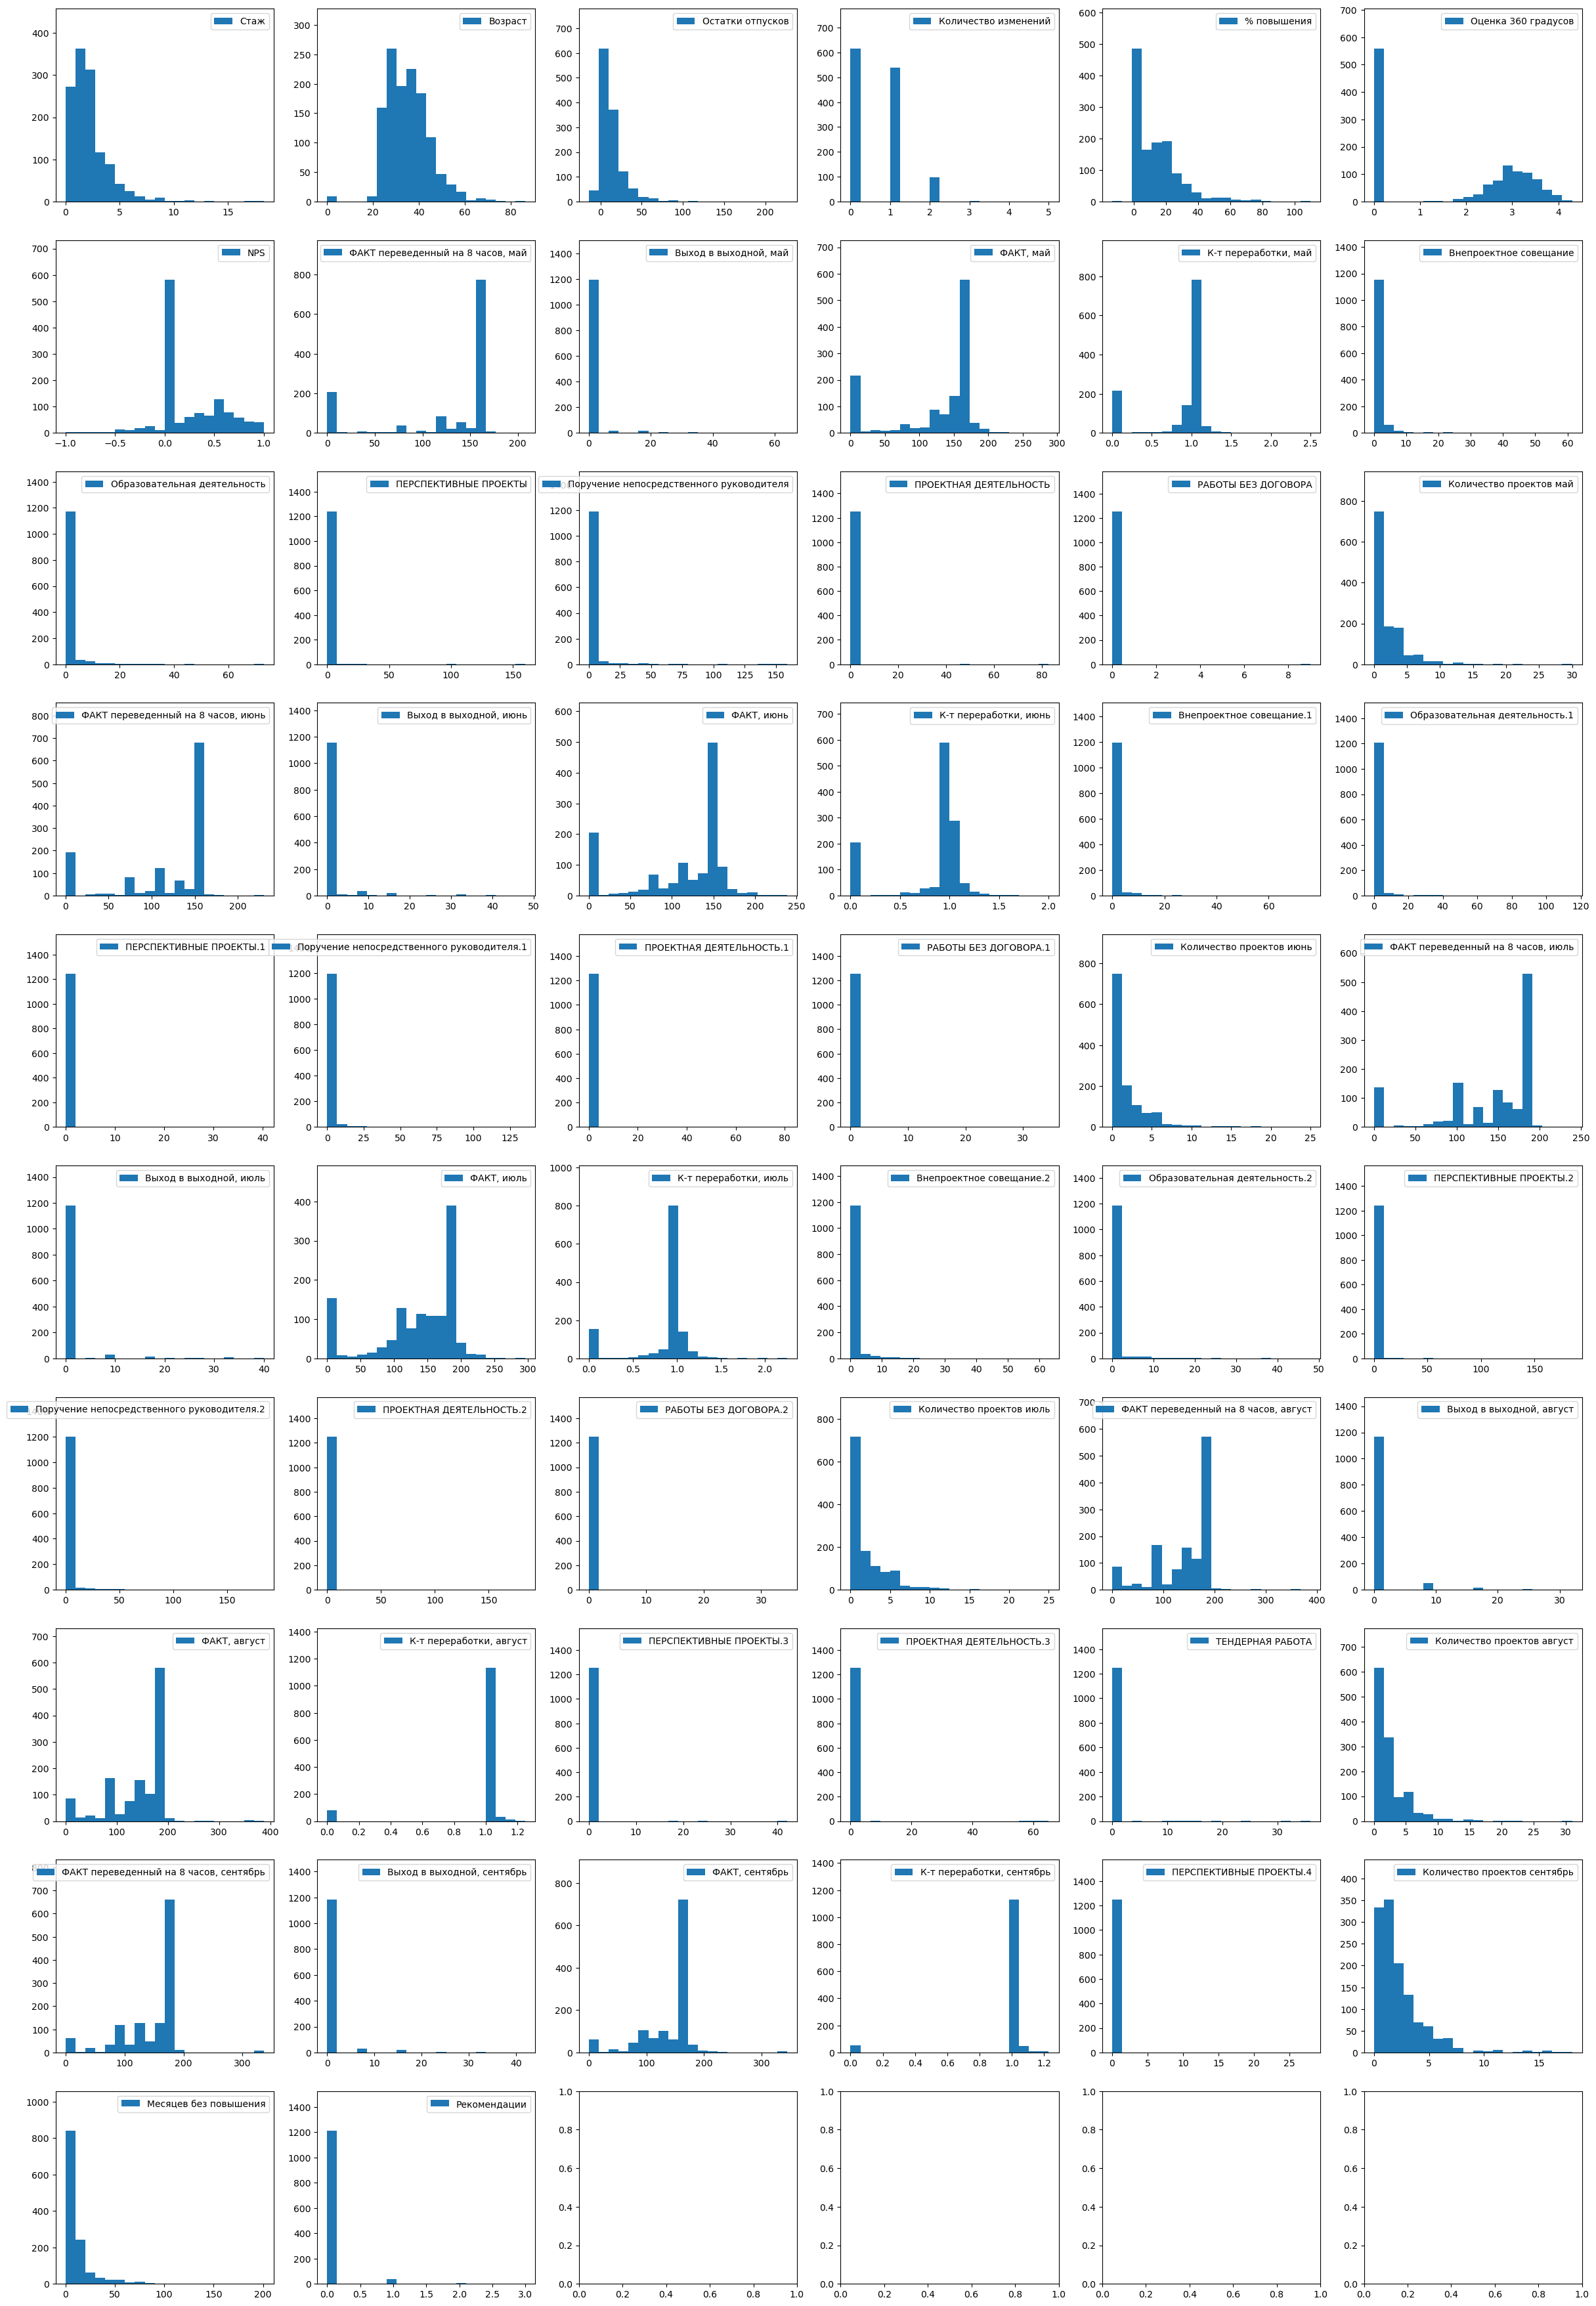

In [38]:
fig, axes = plt.subplots(10, 6, figsize=(30, 45))
for index, column in enumerate(numerical_cols):
    ax = axes.flatten()[index]
    ax.hist(base_df[column], label=column, bins=20)
    ax.legend(loc="upper right", fontsize=10)
    ax.set_ylim((0, 1.2 * ax.get_ylim()[1]))
fig.show()

#### Probably its better to remove columns with a very low amount of non-zero values (e.g. cols project activities, working without a contract and perspective projects). However these cols may be highly correlated with the burnouts and in that case be essential.

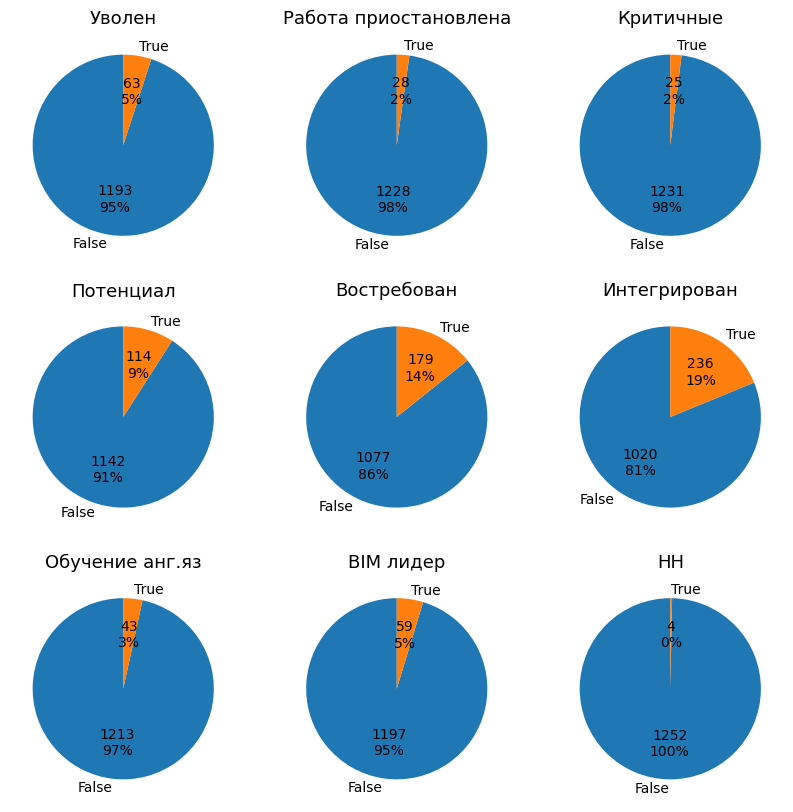

In [26]:
def labelling(val):
    return f"{val / 100 * len(base_df):.0f}\n{val:.0f}%"


fig, axes = plt.subplots(3, 3, figsize=(10, 10))

axes = axes.flatten()
for i, col in enumerate(categorical_cols):
    ax = axes[i]
    value_counts = base_df[col].value_counts()
    ax.pie(value_counts, labels=value_counts.index, autopct=labelling, startangle=90)
    ax.set_title(col, fontsize=13)
    for label in ax.texts:
        label.set_fontsize(10)

<Axes: >

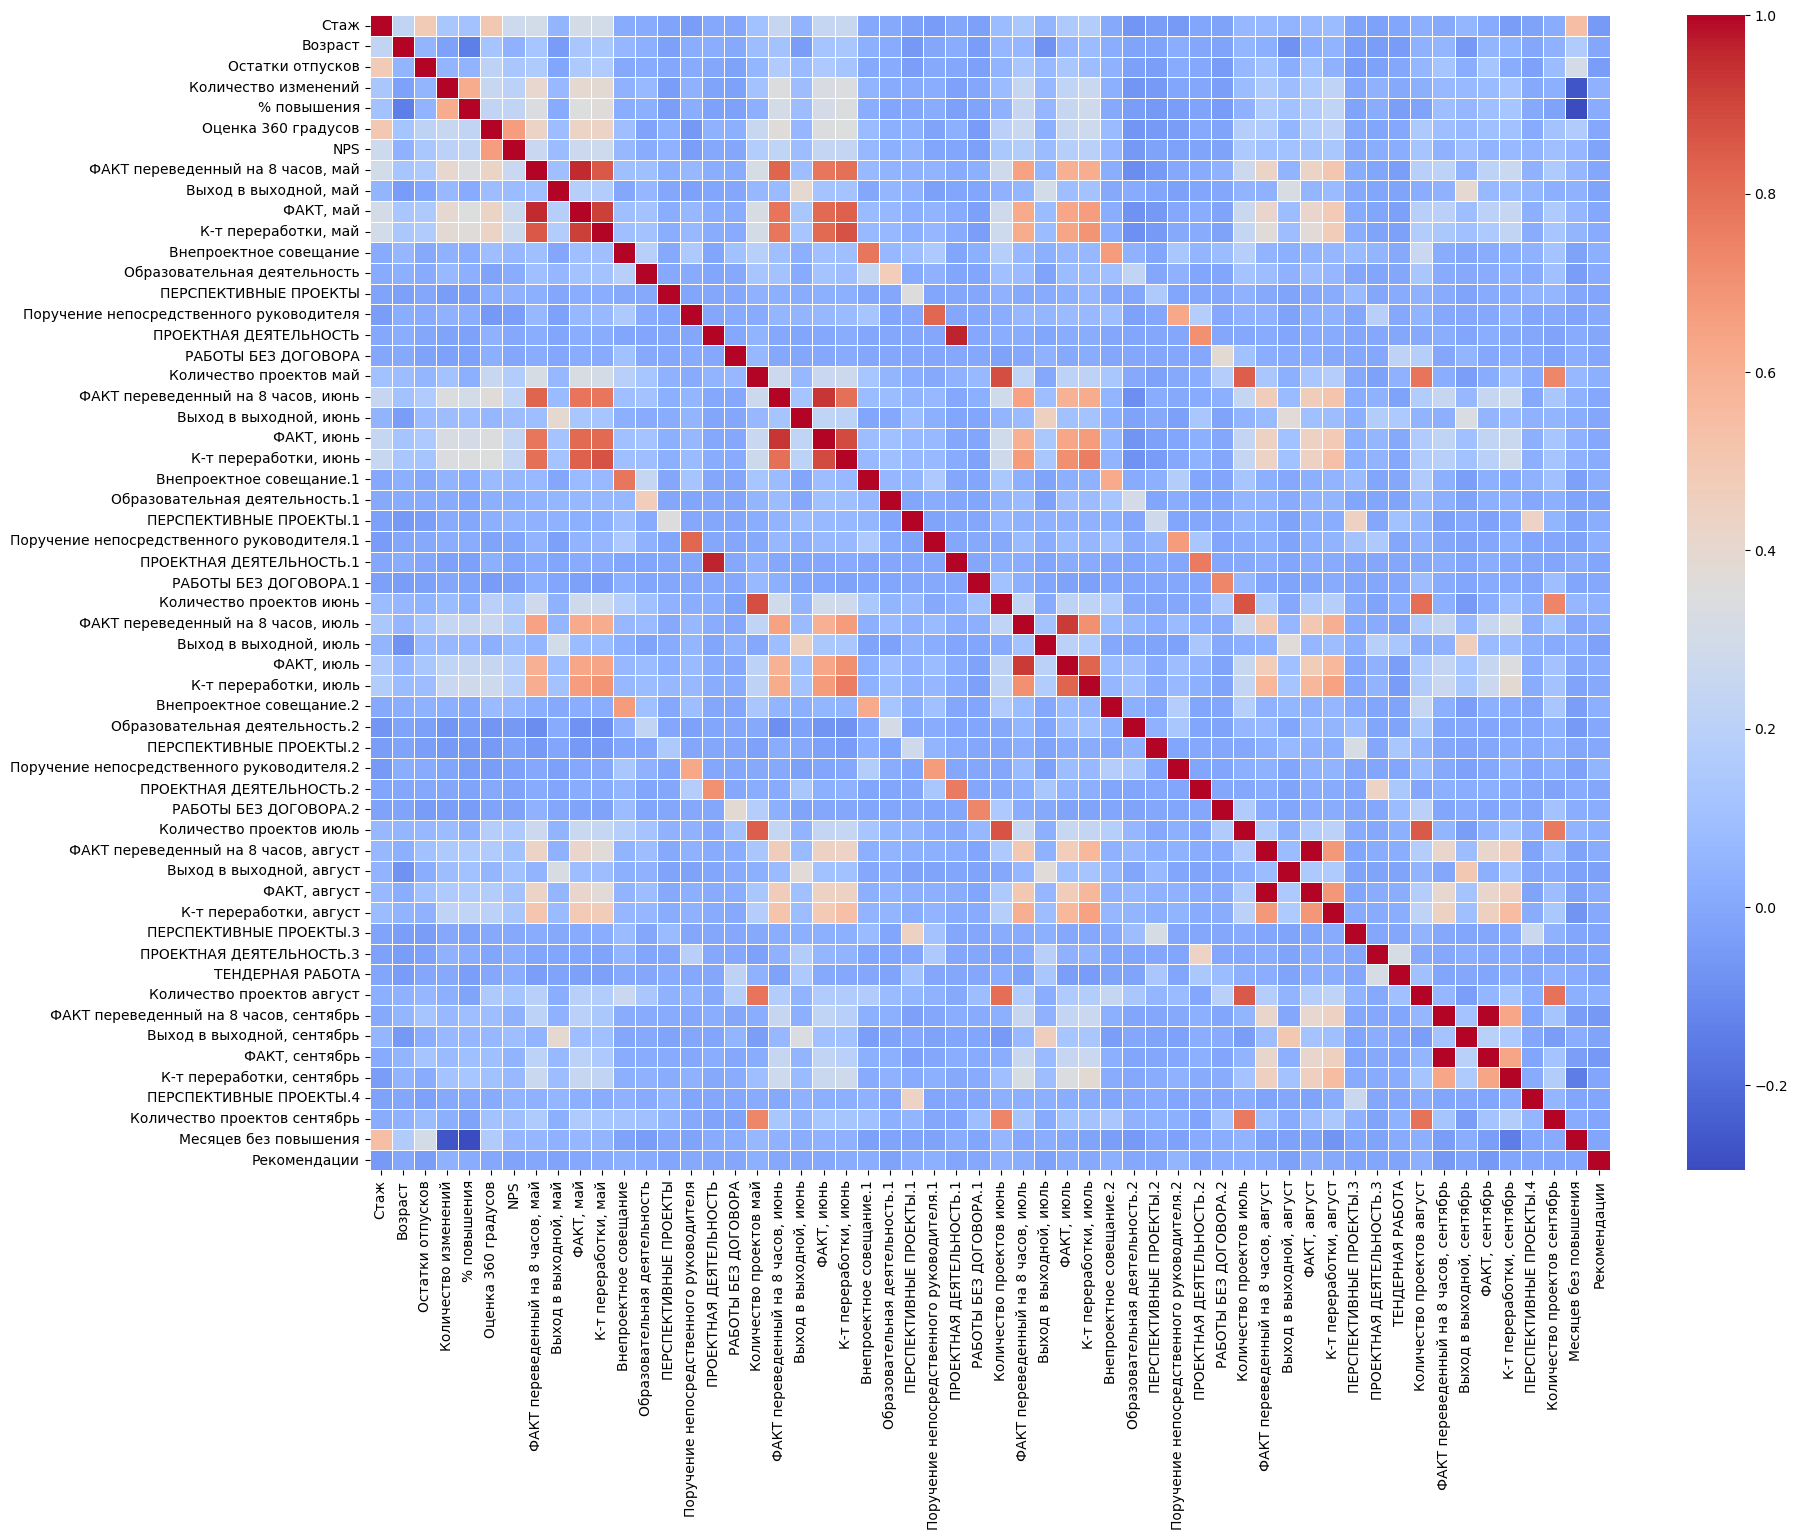

In [35]:
fig, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(
    base_df[numerical_cols].corr(), cbar=True, cmap="coolwarm", linewidth=0.5, ax=ax
)